<a href="https://colab.research.google.com/github/Suchitra-V31/Natural_Language_processing/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam Detection**



In this notebook we are going to predict whether the given mail is spam or not.For this to perform we use Naive Baye's technique.


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

**Load the data**


In [166]:
data=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [167]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [168]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [169]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [170]:
data.shape

(5572, 2)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Let us check whether our data has any nan values


In [172]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

There is no nan values present in our dataset


Let us visualize amd see how many spam and ham values are present in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


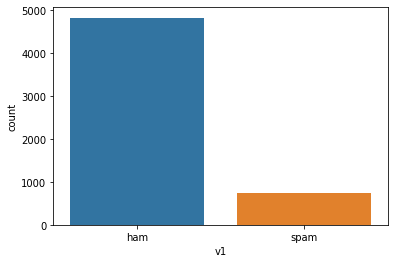

In [173]:
sns.countplot(data['v1'])

We coulde see that there are more ham data than spam.

**Create WordCloud**

In [174]:
from wordcloud import WordCloud

In [175]:
wordcloud=WordCloud(max_font_size=40,max_words=100,background_color='black').generate(str(data['v2']))

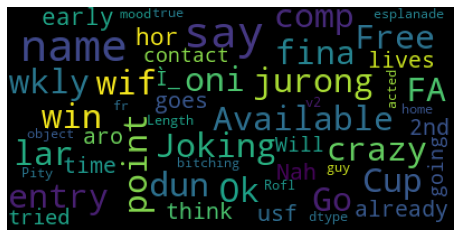

In [176]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [177]:
import nltk
from nltk.corpus import stopwords

In [178]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Data Preprocessing**

In [179]:
msg=data.drop(['v1'],axis=1)
msg.reset_index(inplace=True)

In [180]:
from nltk.stem.porter import PorterStemmer

In [181]:
stemmer=PorterStemmer()

In [182]:
txt=[]
for i in range(0,len(msg)):
  spam=re.sub('[a-zA-Z]',' ',data['v2'][i])
  spam=re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)',' ',data['v2'][i])
  spam=spam.lower()
  spam=spam.split()
  spam=[stemmer.stem(word) for word in spam if word not in stopwords.words('english')]
  spam=' '.join(spam)
  txt.append(spam)

In [183]:
#model
epochs=10
batch_size=64

n_unique_words=5000
max_review_len=20

**Convert text to numbers**

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
cv=CountVectorizer()

In [186]:
X=cv.fit_transform(txt).toarray()
y=data['v1']

**Split the data into train/test**

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Using MultinomialNB**

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
nb=MultinomialNB(alpha=0.1,fit_prior=True,class_prior=None)

In [191]:
model=nb.fit(X_train,y_train)

In [192]:
pred=model.predict(X_test)

In [193]:
from sklearn.metrics import classification_report,confusion_matrix

In [194]:
print('Confusion matrix: ',confusion_matrix(y_test,pred))
print('Classification report: ',classification_report(y_test,pred))

Confusion matrix:  [[940   9]
 [  9 157]]
Classification report:                precision    recall  f1-score   support

         ham       0.99      0.99      0.99       949
        spam       0.95      0.95      0.95       166

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



We could see that our model has performed with 98% accuracy.